Hi! In this notebook, we will be exercising many classification models using **GridSearch** to choose the best parameters.

### Dataset description
Breast cancer datasets contain information about the tumor. There are 10 predictors, all quantitative and one binary variable, indicating the presence or absence of breast cancer.

Predictors are anthropometric data and parameters that can be collected during a routine blood test.

Prediction models based on these predictors, if accurate, can potentially be used as a breast cancer biomarker.

Dataset columns:

Predictors:
   1. Age (years)
   2. BMI (kg/m2)
   3. Glucose (mg/dL)
   4. Insulin (µU/mL)
   5. HOMA
   6. Leptin (ng/mL)
   7. Adiponectin (µg/mL)
   8. Resistin (ng/mL)
   9. MCP-1(pg/dL)
   
Labels: 1 for person healthy 2 for person patient

### Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
%matplotlib inline

### Explore the dataset

In [11]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-dataset/dataR2.csv


In [12]:
data = pd.read_csv("../input/breast-cancer-dataset/dataR2.csv")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [14]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.00,116.00,116.00,116.00,116.00,116.00,116.00,116.00,116.00,116.00
mean,57.30,27.58,97.79,10.01,2.69,26.62,10.18,14.73,534.65,1.55
std,16.11,5.02,22.53,10.07,3.64,19.18,6.84,12.39,345.91,0.50
min,24.00,18.37,60.00,2.43,0.47,4.31,1.66,3.21,45.84,1.00
25%,45.00,22.97,85.75,4.36,0.92,12.31,5.47,6.88,269.98,1.00
50%,56.00,27.66,92.00,5.92,1.38,20.27,8.35,10.83,471.32,2.00
75%,71.00,31.24,102.00,11.19,2.86,37.38,11.82,17.76,700.09,2.00
max,89.00,38.58,201.00,58.46,25.05,90.28,38.04,82.10,1698.44,2.00


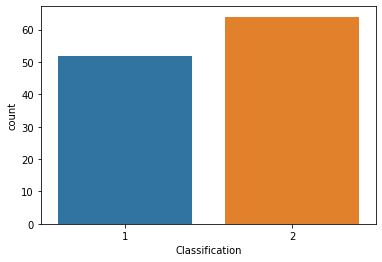

In [15]:
classes = data['Classification']
ax = sns.countplot(x=classes, data=data)

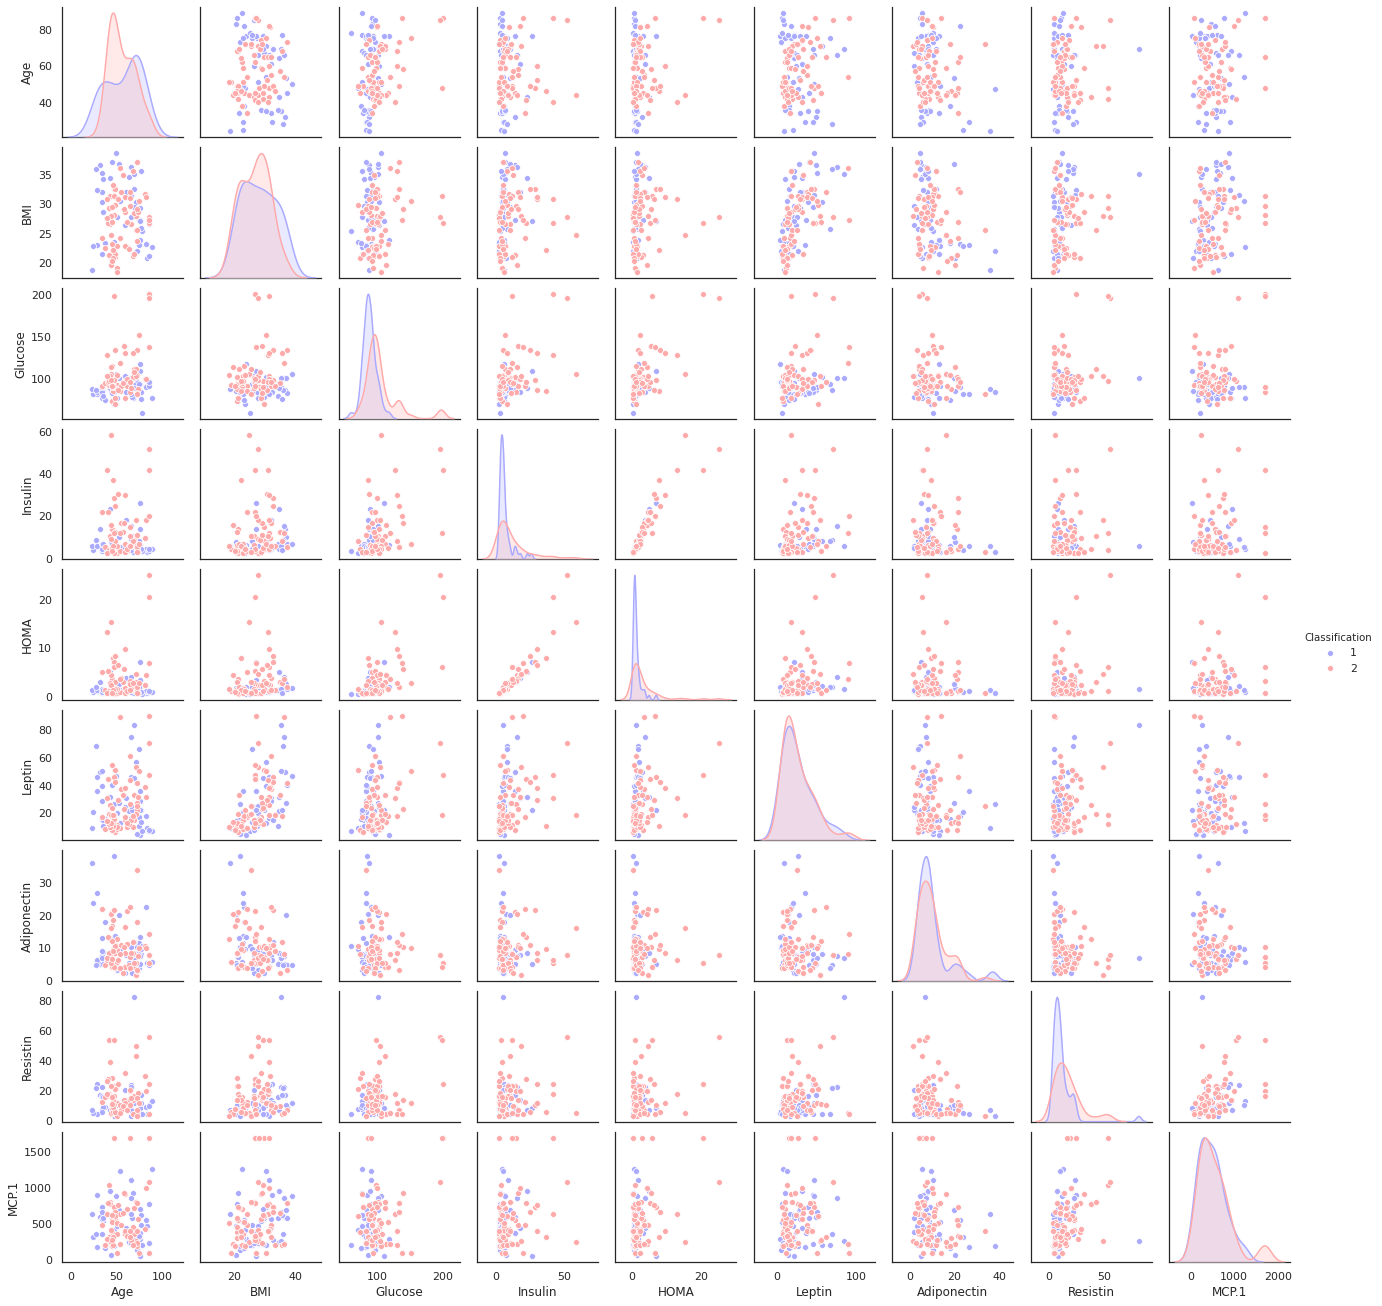

In [16]:
sns.set_style('white')
sns.set_context('notebook')
sns.pairplot(data, hue='Classification', palette='bwr', height=2)

In [17]:
label_encoder = LabelEncoder()
data['Classification'] = label_encoder.fit_transform(data['Classification'])

In [18]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.50,70,2.71,0.47,8.81,9.70,8.00,417.11,0
1,83,20.69,92,3.12,0.71,8.84,5.43,4.06,468.79,0
2,82,23.12,91,4.50,1.01,17.94,22.43,9.28,554.70,0
3,68,21.37,77,3.23,0.61,9.88,7.17,12.77,928.22,0
4,86,21.11,92,3.55,0.81,6.70,4.82,10.58,773.92,0


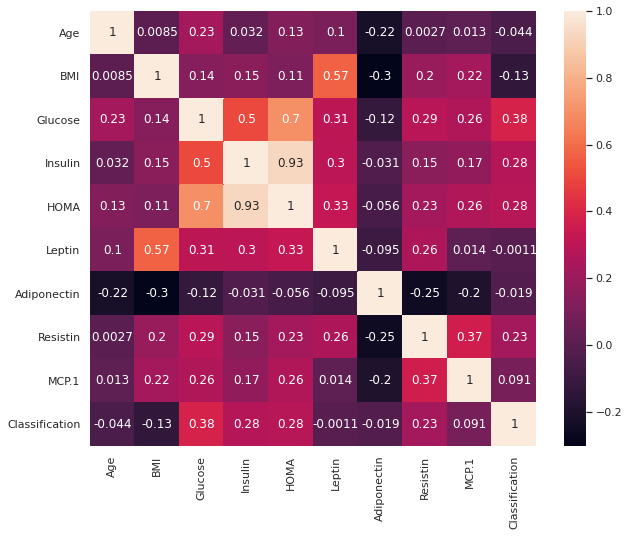

In [19]:
corr = data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot= True)

### Dataset splitting Train/Test

In [20]:
X = data.drop(['Classification'], axis=1)
y = data['Classification'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
classes_test=pd.DataFrame(y_test.reshape(-1,1))
classes_test[0].value_counts()

1    12
0    12
Name: 0, dtype: int64

### Plot ROC function

In [43]:
def plot_roc(roc_auc, false_positive_rate, true_positive_rate):
  plt.figure(figsize=(6, 6))
  plt.title('Receiver Operating Characteristics')
  plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = {:.2f}'.format( roc_auc))
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rtae')
  plt.xlabel('False Positive Rtae')

### Linear discriminant analysis LDA

In [22]:
solvers = ['svd', 'lsqr', 'eigen']
parameters = dict(solver=solvers)
lda = GridSearchCV(
    LinearDiscriminantAnalysis(), parameters, cv=5,scoring='accuracy'
    )
lda.fit(X, y.ravel())
lda_opt = lda.best_estimator_

In [23]:
print(lda.best_params_)
print(lda.best_score_)

{'solver': 'lsqr'}
0.6550724637681159


In [24]:
lda = LinearDiscriminantAnalysis(solver='lsqr')
lda.fit(X_train, y_train.ravel())
lda_pred = lda.predict(X_test)

In [25]:
metrics.accuracy_score(lda_pred, y_test)

0.875

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, lda_pred)
confusion_matrix

array([[11,  1],
       [ 2, 10]])

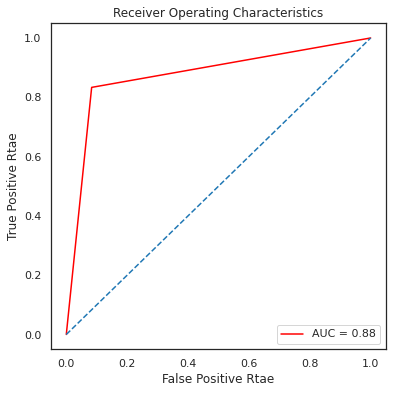

In [46]:
false_positive_rate_lda, true_positive_rate_lda, thresholds = metrics.roc_curve(
    y_test, lda_pred
    )
roc_auc_log_lda = metrics.auc(false_positive_rate_lda, true_positive_rate_lda)
plot_roc(roc_auc_log_lda, false_positive_rate_lda, true_positive_rate_lda)

### Support Vector Machine SVM

In [27]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
shrinkings = [True, False]
prob = [True, False]
parameters = dict(
    kernel=kernels, shrinking=shrinkings, probability=prob
    )
svc = GridSearchCV(svm.SVC(), parameters, cv=5, scoring='accuracy')
svc.fit(X, y.ravel())
svc_opt = svc.best_estimator_

In [28]:
print(svc.best_params_)
print(svc.best_score_)

{'kernel': 'linear', 'probability': True, 'shrinking': True}
0.6724637681159421


In [29]:
svc = svm.SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train.ravel())
svc_pred = svc.predict(X_test)

In [30]:
metrics.accuracy_score(svc_pred, y_test)

0.8333333333333334

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test, svc_pred)
confusion_matrix

array([[12,  0],
       [ 4,  8]])

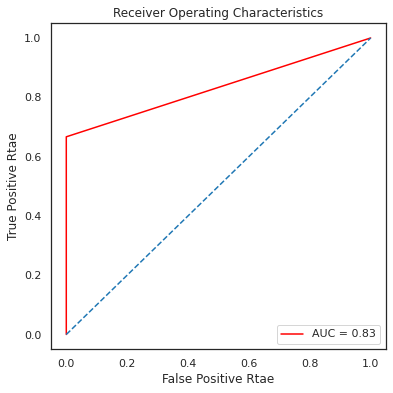

In [48]:
false_positive_rate_svm, true_positive_rate_svm, thresholds = metrics.roc_curve(
    y_test, svc_pred
    )
roc_auc_log_svm = metrics.auc(false_positive_rate_svm, true_positive_rate_svm)
plot_roc(roc_auc_log_svm, false_positive_rate_svm, true_positive_rate_svm)

### k-nearest neighbors KNN

In [32]:
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
neighbors = range(5, 16, 2)
parameters=dict(algorithm=algorithm, n_neighbors=neighbors)
knn = GridSearchCV(
    KNeighborsClassifier(), parameters, cv=5,scoring='accuracy')
knn.fit(X, y.ravel())
knn_opt = knn.best_estimator_
print(knn.best_params_)
print(knn.best_score_)

{'algorithm': 'auto', 'n_neighbors': 11}
0.5597826086956521


In [49]:
knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors=11)
knn.fit(X_train, y_train.ravel())
knn_pred = knn.predict(X_test)
score = metrics.accuracy_score(knn_pred, y_test)
confusion_matrix = metrics.confusion_matrix(y_test, knn_pred)
print(score)
print(confusion_matrix)

0.5
[[ 2 10]
 [ 2 10]]


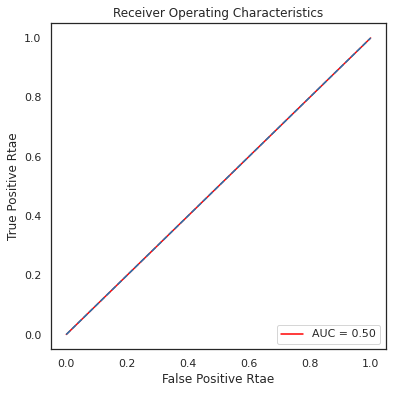

In [50]:
false_positive_rate_knn, true_positive_rate_knn, thresholds = metrics.roc_curve(
    y_test, knn_pred
    )
roc_auc_log_knn = metrics.auc(false_positive_rate_knn, true_positive_rate_knn)
plot_roc(roc_auc_log_knn, false_positive_rate_knn, true_positive_rate_knn)

### Decision tree

In [34]:
criterions = ['gini', 'entropy']
parameters = dict(criterion=criterions)
dtc = GridSearchCV(
    DecisionTreeClassifier(), parameters, cv=5, scoring='accuracy'
)
dtc.fit(X, y.ravel())
dtc_opt = dtc.best_estimator_
print(dtc.best_params_)
print(dtc.best_score_)

{'criterion': 'entropy'}
0.7423913043478261


In [53]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train.ravel())
dtc_pred = dtc.predict(X_test)
score = metrics.accuracy_score(dtc_pred, y_test)
confusion_matrix = metrics.confusion_matrix(y_test, dtc_pred)
print(score)
print(confusion_matrix)

0.9166666666666666
[[10  2]
 [ 0 12]]


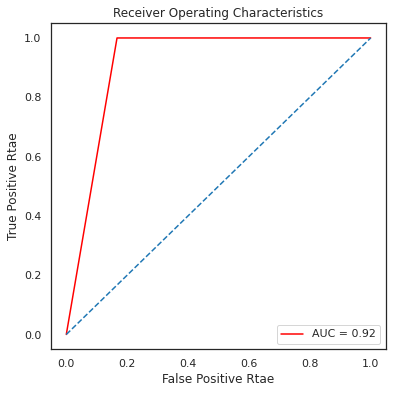

In [54]:
false_positive_rate_dtc, true_positive_rate_dtc, thresholds = metrics.roc_curve(
    y_test, dtc_pred
    )
roc_auc_log_dtc = metrics.auc(false_positive_rate_dtc, true_positive_rate_dtc)
plot_roc(roc_auc_log_dtc, false_positive_rate_dtc, true_positive_rate_dtc)

### Bagging

In [36]:
bagging = BaggingClassifier(n_estimators=500)
bagging.fit(X_train, y_train.ravel())
bagging_pred = bagging.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, bagging_pred)
score = metrics.accuracy_score(bagging_pred, y_test)
print(score)
print(confusion_matrix)

0.875
[[10  2]
 [ 1 11]]


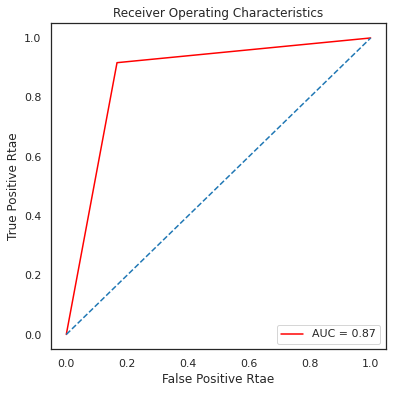

In [55]:
false_positive_rate_bagging, true_positive_rate_bagging, thresholds = metrics.roc_curve(
    y_test, bagging_pred
    )
roc_auc_log_bagging = metrics.auc(false_positive_rate_bagging, true_positive_rate_bagging)
plot_roc(roc_auc_log_bagging, false_positive_rate_bagging, true_positive_rate_bagging)

### Random forest

In [37]:
parameters = {
    'n_estimators': [10, 100, 250, 500]
}
rfc = GridSearchCV(
    RandomForestClassifier(), parameters, cv=5, scoring='accuracy'
)
rfc.fit(X, y.ravel())
rfc_opt = rfc.best_estimator_
print(rfc.best_params_)
print(rfc.best_score_)

{'n_estimators': 250}
0.7076086956521739


In [41]:
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train.ravel())
rfc_pred = rfc.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, rfc_pred)
score = metrics.accuracy_score(rfc_pred, y_test)
print(score)
print(confusion_matrix)

0.875
[[ 9  3]
 [ 0 12]]


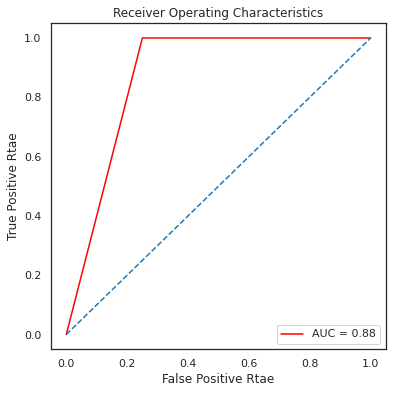

In [56]:
false_positive_rate_rfc, true_positive_rate_rfc, thresholds = metrics.roc_curve(
    y_test, rfc_pred
    )
roc_auc_log_rfc = metrics.auc(false_positive_rate_rfc, true_positive_rate_rfc)
plot_roc(roc_auc_log_rfc, false_positive_rate_rfc, true_positive_rate_rfc)

### Boosting

In [39]:
parameters = {
    'n_estimators': [10, 100, 250, 500],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'max_depth': np.arange(3, 10)
}
boosting = GridSearchCV(
    GradientBoostingClassifier(), parameters, cv=5, scoring='accuracy'
)
boosting.fit(X, y.ravel())
boosting_opt = boosting.best_estimator_
print(boosting.best_params_)
print(boosting.best_score_)

{'criterion': 'mse', 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 500}
0.7423913043478261


In [42]:
gbc = GradientBoostingClassifier(
    n_estimators=500, criterion='mse', loss='exponential'
    )
gbc.fit(X_train, y_train.ravel())
gbc_pred = gbc.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, gbc_pred)
score = metrics.accuracy_score(gbc_pred, y_test)
print(score)
print(confusion_matrix)

0.875
[[ 9  3]
 [ 0 12]]


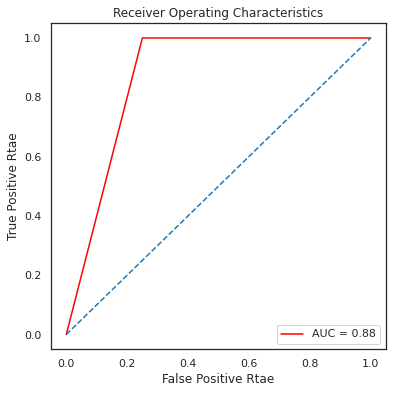

In [57]:
false_positive_rate_gbc, true_positive_rate_gbc, thresholds = metrics.roc_curve(
    y_test, gbc_pred
    )
roc_auc_log_gbc = metrics.auc(false_positive_rate_gbc, true_positive_rate_gbc)
plot_roc(roc_auc_log_gbc, false_positive_rate_gbc, true_positive_rate_gbc)